In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df  =  pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Preprocessing
#### 1) Deal wih Missing Values
#### 2) Data cleaning and making suitable for machine learning models

## Checking for missing Values in Whole Dataset

In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Found missing values, then drop that missing values using dropna() funtion 

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Cleaning dataset

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Date_of_Journey , Dep_Time and Arrival_Time to be converted to datetime data types

In [8]:
def to_change(col):
    df[col] = pd.to_datetime(df[col])
    

for i in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    to_change(i)

In [9]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-06 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-06 05:50:00,2021-04-06 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-06 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-06 18:05:00,2021-04-06 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-06 16:50:00,2021-04-06 21:35:00,4h 45m,1 stop,No info,13302


In [11]:
df["Journey_day"]= df["Date_of_Journey"].dt.day
df["Journey_month"]= df["Date_of_Journey"].dt.month

In [12]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-04-06 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-06 05:50:00,2021-04-06 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-06 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-06 18:05:00,2021-04-06 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-06 16:50:00,2021-04-06 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [14]:
def get_hr(df,col):
    df[col+"_hour"]=df[col].dt.hour

def get_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
    
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)

    

In [15]:
get_hr(df,'Dep_Time')
get_min(df,'Dep_Time')
drop_col(df,'Dep_Time')

In [16]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-06 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-06 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [17]:
get_hr(df,'Arrival_Time')
get_min(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

In [18]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [19]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(" "))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]= duration[i] + " 0m"
        else:
            duration[i]= "0h " + duration[i]

In [20]:
df['Duration'] = duration

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
def hour(x):
    return x.split(" ")[0][:-1]

def mins(x):
    return x.split(" ")[1][:-1]



In [23]:
df['Duration_hour'] = df['Duration'].apply(hour)
df['Duration_minutes'] = df['Duration'].apply(mins)

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [25]:
df.drop('Duration',axis=1,inplace=True)

In [26]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minutes       object
dtype: object

In [27]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_minutes'] = df['Duration_minutes'].astype(int)

In [28]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int64
Duration_minutes        int64
dtype: object

In [29]:
cat_col = [col for col in df.columns if df[col].dtype=='O']

In [30]:
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [31]:
count_col = [col for col in df.columns if df[col].dtype!='O']

In [32]:
print(count_col)

['Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour', 'Duration_minutes']


In [33]:
## Nominal data -- > One hot Coding
## Ordinal Data -- > LabelEncoder

In [34]:
categorial = df[cat_col]
categorial.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [35]:
categorial['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

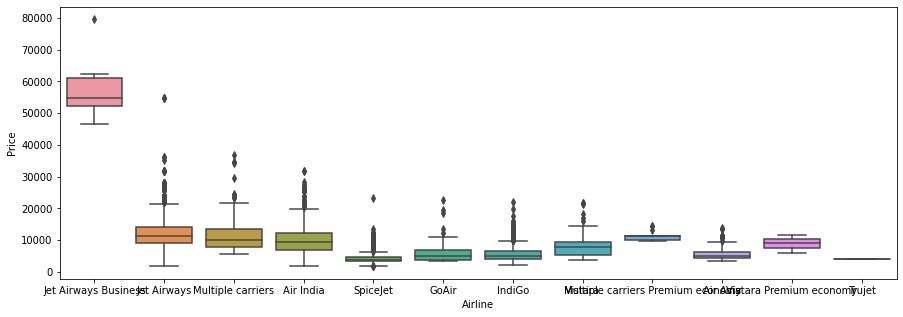

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=df.sort_values("Price",ascending=False))

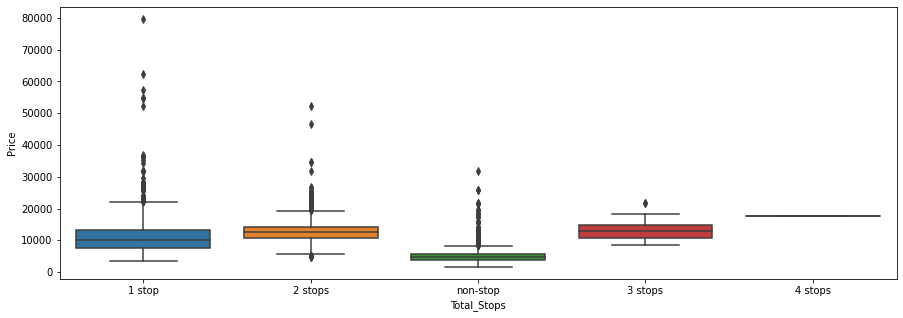

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values("Price",ascending=False))

In [38]:
## Converting catergorial daa to numerical for machine learning purpose

In [39]:
Arlines =  pd.get_dummies(categorial['Airline'],drop_first=True)

In [40]:
Arlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


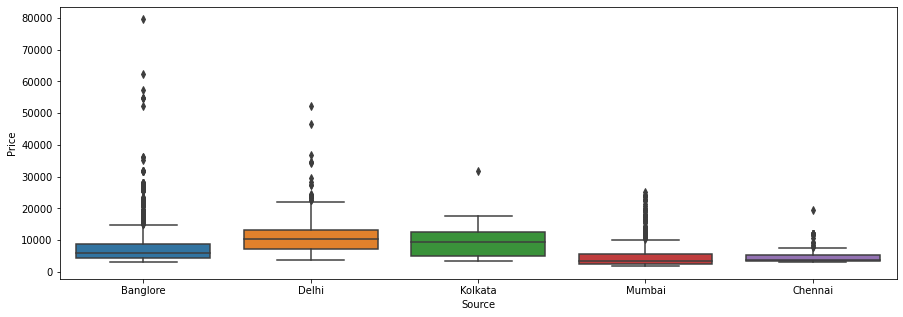

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=df.sort_values("Price",ascending=False))

In [42]:
Sources =  pd.get_dummies(categorial['Source'],drop_first=True)

In [43]:
Sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


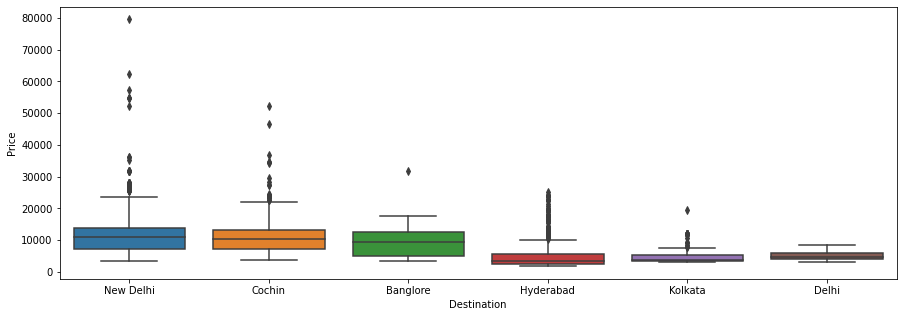

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=df.sort_values("Price",ascending=False))

In [45]:
Destinations =  pd.get_dummies(categorial['Destination'],drop_first=True)

In [46]:
Destinations.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorial.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [48]:
categorial["Route_1"] = categorial['Route'].str.split("→").str[0]
categorial["Route_2"] = categorial['Route'].str.split("→").str[1]
categorial["Route_3"] = categorial['Route'].str.split("→").str[2]
categorial["Route_4"] = categorial['Route'].str.split("→").str[3]
categorial["Route_5"] = categorial['Route'].str.split("→").str[4]
categorial.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [49]:
categorial.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
categorial.drop("Route",axis=1,inplace=True)

In [51]:
categorial.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
categorial.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [53]:
for i in ["Route_3","Route_4","Route_5"]:
    categorial[i].fillna("None",inplace=True)

In [54]:
categorial.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [55]:
for i in categorial.columns:
    print("{} has {} categories".format(i,len(categorial[i].value_counts())))

Airline has 12 categories
Source has 5 categories
Destination has 6 categories
Total_Stops has 5 categories
Additional_Info has 10 categories
Route_1 has 5 categories
Route_2 has 45 categories
Route_3 has 30 categories
Route_4 has 14 categories
Route_5 has 6 categories


In [56]:
## Here Route_3 ,4 and 5 have mpre categorical values so we should use label encoder instaed of one hot encoding 

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
encoder = LabelEncoder()

In [59]:
categorial.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [60]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorial[i] = encoder.fit_transform(categorial[i])

In [61]:
categorial.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
categorial.drop("Additional_Info",axis=1,inplace=True)

In [63]:
categorial.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [64]:
categorial['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [65]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [66]:
categorial["Total_Stops"] = categorial["Total_Stops"].map(dict)

In [67]:
categorial.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [68]:
final_data = pd.concat([categorial,Arlines,Sources,Destinations,df[count_col]],axis=1)

In [69]:
final_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minutes'],
      dtype='object')

In [70]:
drop_col(final_data,'Airline')
drop_col(final_data,'Source')
drop_col(final_data,'Destination')

In [71]:
final_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [72]:
pd.set_option('display.max_columns',35)
final_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [73]:
final_data.to_excel("Dataset After Preprocessing.xlsx")

In [74]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.boxplot(df[col],ax=ax1)
    sns.distplot(df[col],ax=ax2)

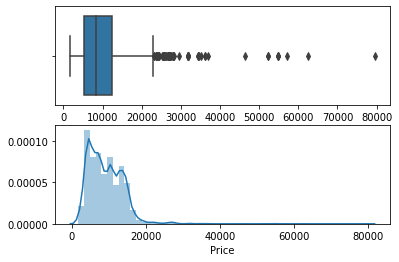

In [75]:
plot(final_data,'Price')

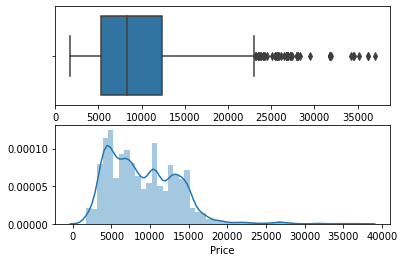

In [76]:
final_data['Price'] = np.where(final_data['Price']>=40000,final_data['Price'].median(),final_data['Price'])
plot(final_data,'Price')

In [77]:
X = final_data.drop('Price',axis=1)
y = final_data['Price']

In [78]:
"Price" in X.columns

False

In [79]:
## Feature selection starts from here 

In [80]:
from sklearn.feature_selection import mutual_info_classif

In [81]:
mutual_info_classif(X,y)

array([2.16160855, 2.00401074, 2.75242817, 2.3156608 , 1.47869327,
       0.70648162, 0.75238124, 0.09219982, 0.65865714, 0.91232311,
       0.        , 0.56229678, 0.01502221, 0.32475672, 0.        ,
       0.22103877, 0.00643272, 0.17855881, 1.55176221, 0.87088257,
       0.30664302, 1.55188678, 0.41189122, 0.29437789, 0.16924452,
       0.38048791, 1.08170409, 0.85736814, 1.38833345, 1.20999028,
       1.82934782, 1.4917267 , 1.76806806, 1.06959961])

In [82]:
imp_cols = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [83]:
imp_cols.head()

,0
Total_Stops,2.162971
Route_1,2.017962
Route_2,2.752243
Route_3,2.283421
Route_4,1.486365


In [84]:
imp_cols.columns=["Imp"]
most_imp=imp_cols.sort_values(by="Imp",ascending=False)

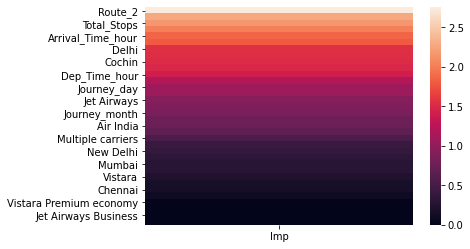

In [85]:
sns.heatmap(most_imp)

## Random Forest 

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [93]:
from sklearn import metrics

def predict_info(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print("Score is {}".format(model.score(X_train,y_train)))
    predictions =  model.predict(X_test)
    print("Prediction is {}".format(predictions))
    print("\n")
    r2_score = metrics.r2_score(y_test,predictions)
    print("r2_score is {} so {:.2f}% accuracy is there".format(r2_score,r2_score*100))
    
    print("Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test,predictions)))
    print("Mean Squared Error is {}".format(metrics.mean_squared_error(y_test,predictions)))
    print("Root Mean Absolute Error is {}".format(np.sqrt(metrics.mean_absolute_error(y_test,predictions))))
    
    sns.distplot(y_test-predictions)
    if dump==1:
        file=open('/home/dhrumil/Documents/Github/Predict-Price-of-Airlines-Industry/model.pkl','wb')
        pickle.dump(model,file)
    
    

In [96]:
from sklearn.ensemble import RandomForestRegressor
import pickle

Score is 0.953414781712556
Prediction is [15750.63       12956.12        9773.58       ... 10050.77233333
  6975.605      14547.35      ]


r2_score is 0.8184365638472095 so 81.84% accuracy is there
Mean Absolute Error is 1138.967014549429
Mean Squared Error is 3733617.407893017
Root Mean Absolute Error is 33.74858537108525


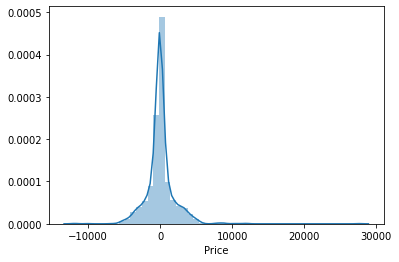

In [97]:
predict_info(RandomForestRegressor(),1)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Score is 0.9661804558281011
Prediction is [15676. 13584.  8266. ... 10877.  7740. 15532.]


r2_score is 0.7050574244249692 so 70.51% accuracy is there
Mean Absolute Error is 1321.0333645297144
Mean Squared Error is 6065112.876411116
Root Mean Absolute Error is 36.34602267827547


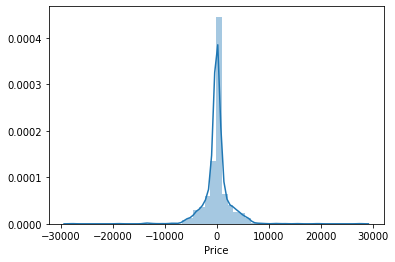

In [99]:
predict_info(DecisionTreeRegressor(),0)

Score is 0.6155690286236363
Prediction is [ 7809.    12198.5   11538.25  ... 10645.125 10276.75  13017.25 ]


r2_score is 0.6154888473109603 so 61.55% accuracy is there
Mean Absolute Error is 1941.729936827328
Mean Squared Error is 7906974.904356282
Root Mean Absolute Error is 44.065064811336974


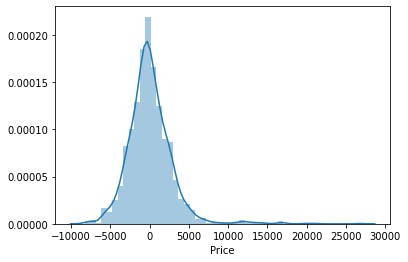

In [101]:
predict_info(LinearRegression(),0)

Score is 0.778246424564244
Prediction is [ 6106.  13429.  11728.6 ...  8790.6  6969.6 12970. ]


r2_score is 0.6774935474173324 so 67.75% accuracy is there
Mean Absolute Error is 1696.731024801123
Mean Squared Error is 6631928.382910622
Root Mean Absolute Error is 41.19139503344264


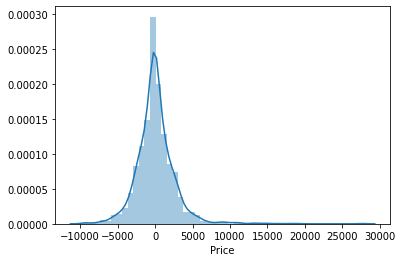

In [102]:
predict_info(KNeighborsRegressor(),0)

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [105]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [106]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [107]:
reg_rf=RandomForestRegressor()

In [108]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [109]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [110]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [115]:
prediction3=rf_random.predict(X_test)

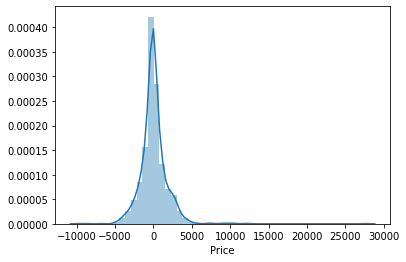

In [116]:
sns.distplot(y_test-prediction3)

In [117]:
metrics.r2_score(y_test,prediction3)

0.8495423815796922

In [118]:
print('MAE',metrics.mean_absolute_error(y_test,prediction3))
print('MSE',metrics.mean_squared_error(y_test,prediction3))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction3)))

MAE 1110.5091420197857
MSE 3093966.468069363
RMSE 1758.9674437207082


In [119]:
file=open('rf_random.pkl','wb')

In [120]:
pickle.dump(rf_random,file)

In [121]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [122]:
y_prediction=forest.predict(X_test)

In [123]:
y_prediction

array([15510.86292249, 12018.59585279, 10308.27994455, ...,
       10251.70206359,  7425.14933511, 13516.28925918])

In [124]:
metrics.r2_score(y_test,y_prediction)

0.8495423815796922